In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'eyesornot/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'eyesornot/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 893 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [3]:
# Mendapatkan daftar kelas beserta indeksnya
classes = train_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: else
Kelas 1: eyes


In [4]:
# Mendapatkan daftar kelas beserta indeksnya
classes = test_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: else
Kelas 1: eyes


# MobileNetV2

Epoch 1/10
28/28 [==============================] - 55s 2s/step - loss: 0.5576 - accuracy: 0.7111 - val_loss: 0.2139 - val_accuracy: 0.9593
Epoch 2/10
28/28 [==============================] - 50s 2s/step - loss: 0.2365 - accuracy: 0.9227 - val_loss: 0.1296 - val_accuracy: 0.9638
Epoch 3/10
28/28 [==============================] - 51s 2s/step - loss: 0.1705 - accuracy: 0.9395 - val_loss: 0.0917 - val_accuracy: 0.9729
Epoch 4/10
28/28 [==============================] - 48s 2s/step - loss: 0.1176 - accuracy: 0.9653 - val_loss: 0.0694 - val_accuracy: 0.9729
Epoch 5/10
28/28 [==============================] - 49s 2s/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.0717 - val_accuracy: 0.9729
Epoch 6/10
28/28 [==============================] - 47s 2s/step - loss: 0.0819 - accuracy: 0.9731 - val_loss: 0.0654 - val_accuracy: 0.9729
Epoch 7/10
28/28 [==============================] - 46s 2s/step - loss: 0.0828 - accuracy: 0.9686 - val_loss: 0.0591 - val_accuracy: 0.9774
Epoch 8/10
28/28 [==

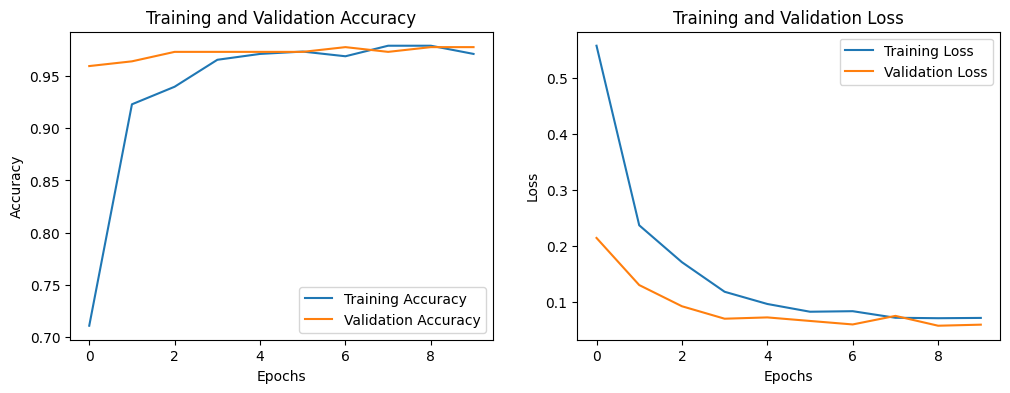

7/7 [==============================] - 7s 1s/step - loss: 0.0588 - accuracy: 0.9774
Test Accuracy: 97.74%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
              

In [9]:
input_shape = (224, 224, 3)  


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

modelV2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


modelV2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history = modelV2.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = modelV2.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

modelV2.summary()

# Input User

In [40]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Membuat widget upload file
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Menampilkan widget
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

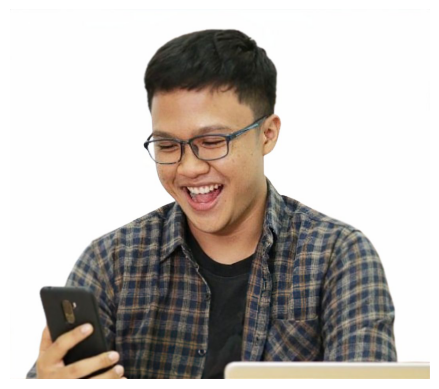

In [41]:
# Mengambil gambar dari widget upload
image = Image.open(io.BytesIO(uploader.data[0]))

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array numpy
image_array = np.array(image.resize((224, 224))) / 255.0  # Mengubah ukuran dan normalisasi
image_array = np.expand_dims(image_array, axis=0)  # Menambahkan dimensi batch

In [42]:
# Melakukan prediksi
prediction = modelvgg.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas mata")
else:
    print("Gambar tersebut diprediksi masuk kelas lainnya")

1/1 [==============================] - 0s 235ms/step
Gambar tersebut diprediksi masuk kelas lainnya


In [43]:
# Melakukan prediksi
prediction = modelV2.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas mata")
else:
    print("Gambar tersebut diprediksi masuk kelas lainnya")

1/1 [==============================] - 0s 75ms/step
Gambar tersebut diprediksi masuk kelas lainnya
